<a href="https://colab.research.google.com/github/vandanareddy1735/special-project/blob/main/special_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install opencv-python tensorflow matplotlib numpy


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


Saving Screenshot 2025-04-28 133859.png to Screenshot 2025-04-28 133859.png


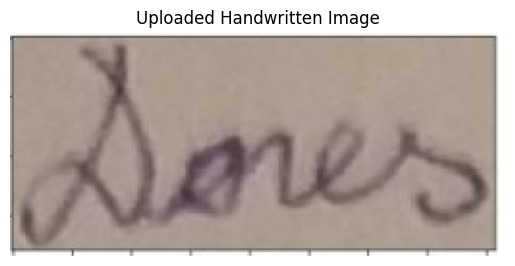

In [ ]:
from google.colab import files

uploaded = files.upload()

# Load the uploaded image
for file in uploaded.keys():
    img = cv2.imread(file)
    break

# Display the uploaded image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Uploaded Handwritten Image')
plt.show()


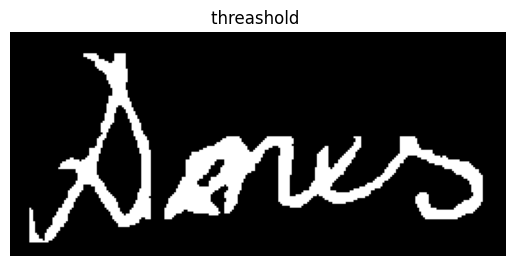

In [ ]:
# Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title('threashold ')
plt.show()






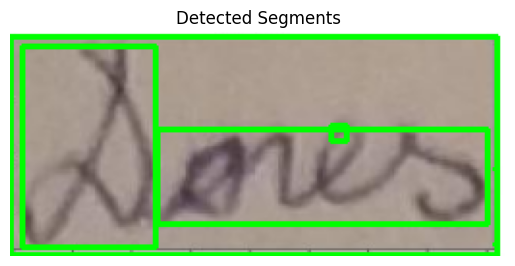

In [ ]:
# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected words/characters
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Segments')
plt.show()


In [ ]:
# Load pretrained EMNIST (handwritten characters) model
# (Optional: This step assumes a model is pre-trained or available)

# Let's create a simple dummy CNN for demonstration
model = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')  # For 26 alphabets
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Dummy model created (you should load a trained model for real usage)")


Dummy model created (you should load a trained model for real usage)


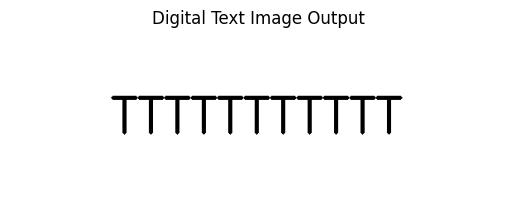

In [ ]:
import numpy as np
import cv2

# Set width and height for output image
width = 600
height = 200

# Create a white blank image
output_img = np.ones((height, width, 3), dtype=np.uint8) * 255

# Define font
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
font_thickness = 3
font_color = (0, 0, 0)  # Black color

# Get text size
(text_width, text_height), _ = cv2.getTextSize(recognized_text, font, font_scale, font_thickness)

# Calculate center position
x = (width - text_width) // 2
y = (height + text_height) // 2

# Put the recognized text on the image
cv2.putText(output_img, recognized_text, (x, y), font, font_scale, font_color, font_thickness)

# Show output image
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Digital Text Image Output')
plt.axis('off')
plt.show()




Saving Screenshot 2025-04-28 132210.png to Screenshot 2025-04-28 132210 (1).png


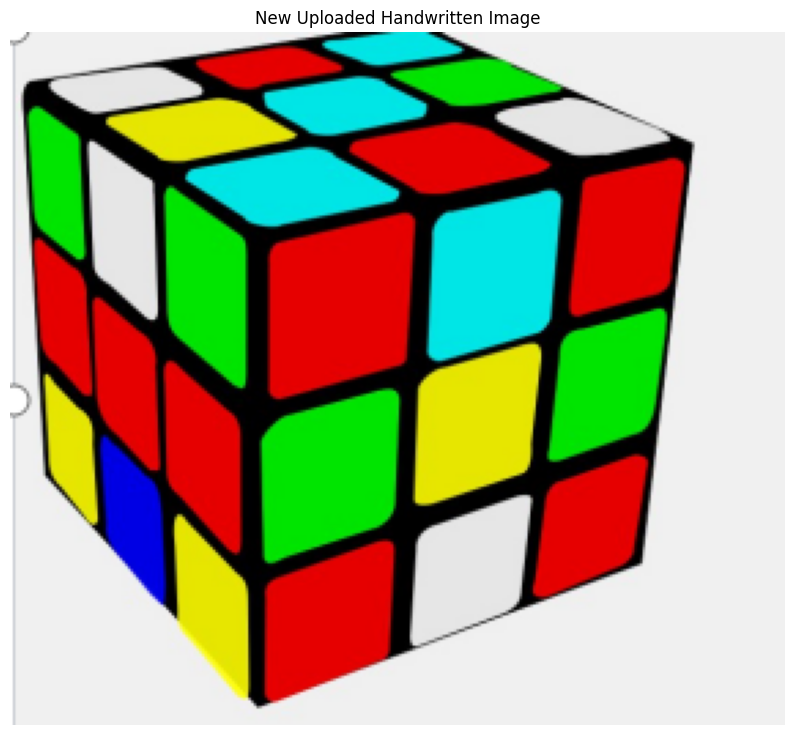

In [ ]:
# Upload another image
uploaded = files.upload()

# Pick the first uploaded image
for file in uploaded.keys():
    img_path = file

# Read and display the new uploaded image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('New Uploaded Handwritten Image')
plt.show()


Saving Screenshot 2025-04-28 135149.png to Screenshot 2025-04-28 135149 (5).png


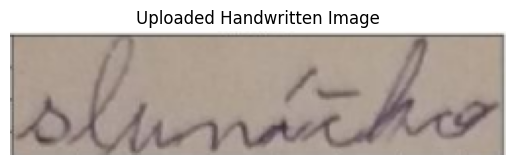

In [ ]:
from google.colab import files

uploaded = files.upload()

# Load the uploaded image
for file in uploaded.keys():
    img = cv2.imread(file)
    break

# Display the uploaded image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Uploaded Handwritten Image')
plt.show()


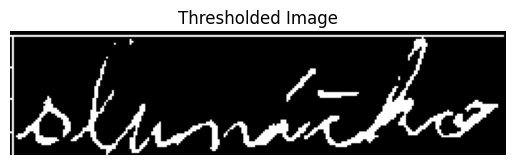

In [ ]:
# Convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title('Thresholded Image')
plt.show()


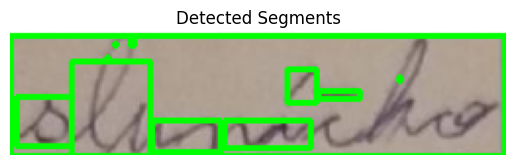

In [ ]:
# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected words/characters
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Segments')
plt.show()


In [ ]:
# Load pretrained EMNIST (handwritten characters) model
# (Optional: This step assumes a model is pre-trained or available)

# Let's create a simple dummy CNN for demonstration
model = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')  # For 26 alphabets
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Dummy model created (you should load a trained model for real usage)")


Dummy model created (you should load a trained model for real usage)


In [ ]:
recognized_text = ""

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    char = thresh[y:y+h, x:x+w]
    char = cv2.resize(char, (28,28))
    char = char.reshape(1,28,28,1)
    char = char/255.0

    prediction = model.predict(char)
    predicted_label = np.argmax(prediction)

    # Convert prediction (0-25) to corresponding alphabet
    recognized_char = chr(predicted_label + ord('A'))
    recognized_text += recognized_char

print("Recognized Text:", recognized_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Recognized Text: TTTTTTTTTTT


In [ ]:
!pip install opencv-python pytesseract matplotlib
!apt-get install tesseract-ocr



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [ ]:
!pip install pytesseract

Saving download.jpg to download.jpg


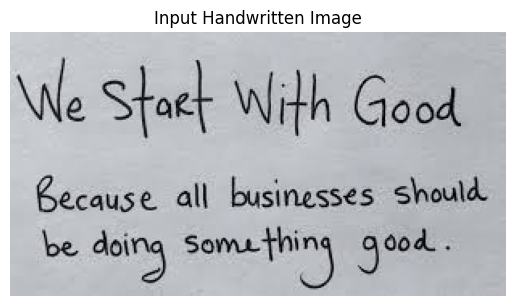

In [ ]:
# Upload your input handwritten image
uploaded = files.upload()

# Read uploaded image
for file_name in uploaded.keys():
    img_path = file_name

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display uploaded image
plt.imshow(img_rgb)
plt.title('Input Handwritten Image')
plt.axis('off')
plt.show()


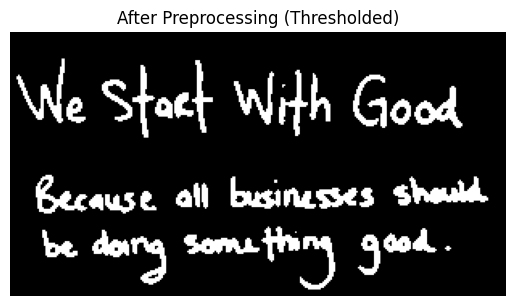

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur to remove noise
gray = cv2.GaussianBlur(gray, (5,5), 0)

# Thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Show preprocessed image
plt.imshow(thresh, cmap='gray')
plt.title('After Preprocessing (Thresholded)')
plt.axis('off')
plt.show()


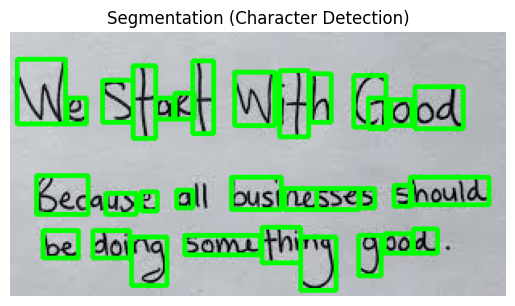

In [ ]:
# Find contours (characters)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours left-to-right
def sort_contours(cnts):
    bounding_boxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, bounding_boxes) = zip(*sorted(zip(cnts, bounding_boxes),
                                         key=lambda b: b[1][0]))
    return cnts

sorted_contours = sort_contours(contours)

# Draw bounding boxes
img_copy = img_rgb.copy()
for cnt in sorted_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w*h > 100:  # filter very small areas
        cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(img_copy)
plt.title('Segmentation (Character Detection)')
plt.axis('off')
plt.show()


In [ ]:
# Initialize recognized text
recognized_text = ""

# Loop through each character contour
for cnt in sorted_contours:
    x, y, w, h = cv2.boundingRect(cnt)

    if w*h > 100:  # ignore small noise
        char = thresh[y:y+h, x:x+w]
        char = cv2.resize(char, (28,28))

        # Prepare for Tesseract
        char = cv2.copyMakeBorder(char, 10,10,10,10, cv2.BORDER_CONSTANT, value=[0,0,0])

        # Recognize using pytesseract
        config = '--psm 10 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
        text = pytesseract.image_to_string(char, config=config)

        recognized_text += text.strip()

print("Recognized Text:", recognized_text)


Recognized Text: nibermSstytaaiatrrWwudesurhVJGsayesmtaod


In [ ]:
# Save recognized text
with open('recognized_output.txt', 'w') as f:
    f.write(recognized_text)



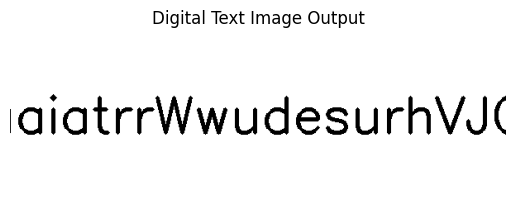

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import cv2

# Set width and height for output image
width = 600
height = 200

# Create a white blank image
output_img = np.ones((height, width, 3), dtype=np.uint8) * 255

# Define font
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
font_thickness = 3
font_color = (0, 0, 0)  # Black color

# Get text size
(text_width, text_height), _ = cv2.getTextSize(recognized_text, font, font_scale, font_thickness)

# Calculate center position
x = (width - text_width) // 2
y = (height + text_height) // 2

# Put the recognized text on the image
cv2.putText(output_img, recognized_text, (x, y), font, font_scale, font_color, font_thickness)

# Show output image
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Digital Text Image Output')
plt.axis('off')
plt.show()

# Save the image
cv2.imwrite('digital_text_output.png', output_img)

# Download the digital text image
files.download('digital_text_output.png')





In [ ]:
!pip install opencv-python matplotlib


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


Saving Screenshot 2025-04-28 132210.png to Screenshot 2025-04-28 132210.png


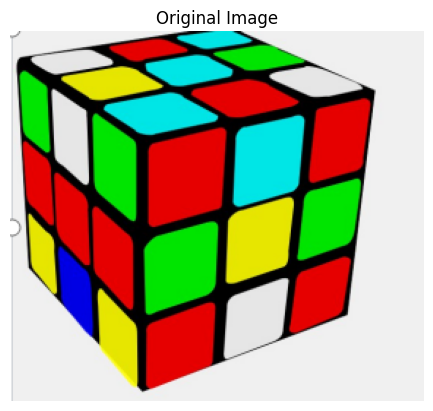

In [ ]:
uploaded = files.upload()

# Read uploaded image
for file_name in uploaded.keys():
    img_path = file_name

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


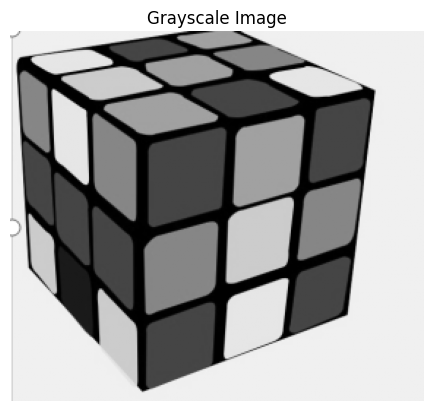

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


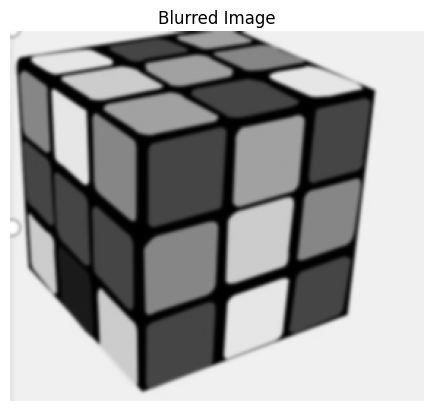

In [ ]:
# Apply slight Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()


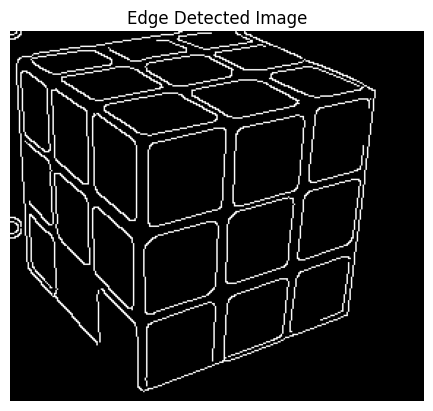

In [ ]:
# Apply Canny Edge Detector
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')
plt.show()


Saving Screenshot 2025-04-30 172001.png to Screenshot 2025-04-30 172001.png


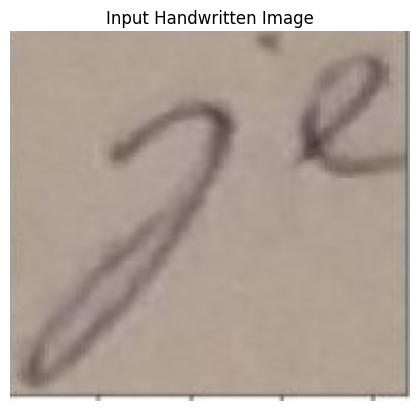

In [ ]:
# Upload your input handwritten image
uploaded = files.upload()

# Read uploaded image
for file_name in uploaded.keys():
    img_path = file_name

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display uploaded image
plt.imshow(img_rgb)
plt.title('Input Handwritten Image')
plt.axis('off')
plt.show()


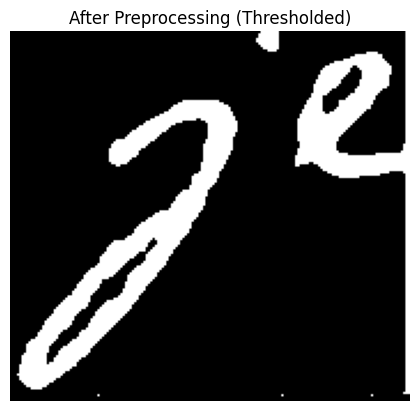

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur to remove noise
gray = cv2.GaussianBlur(gray, (5,5), 0)

# Thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Show preprocessed image
plt.imshow(thresh, cmap='gray')
plt.title('After Preprocessing (Thresholded)')
plt.axis('off')
plt.show()


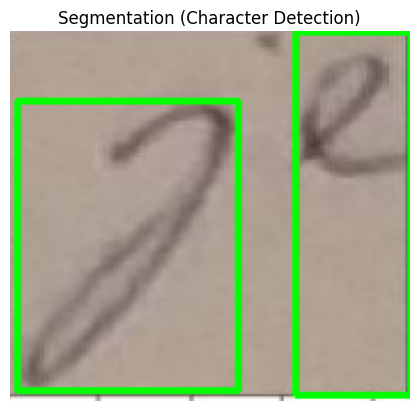

In [ ]:
# Find contours (characters)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours left-to-right
def sort_contours(cnts):
    bounding_boxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, bounding_boxes) = zip(*sorted(zip(cnts, bounding_boxes),
                                         key=lambda b: b[1][0]))
    return cnts

sorted_contours = sort_contours(contours)

# Draw bounding boxes
img_copy = img_rgb.copy()
for cnt in sorted_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w*h > 100:  # filter very small areas
        cv2.rectangle(img_copy, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(img_copy)
plt.title('Segmentation (Character Detection)')
plt.axis('off')
plt.show()


In [ ]:
# Initialize recognized text
recognized_text = ""

# Loop through each character contour
for cnt in sorted_contours:
    x, y, w, h = cv2.boundingRect(cnt)

    if w*h > 100:  # ignore small noise
        char = thresh[y:y+h, x:x+w]
        char = cv2.resize(char, (28,28))

        # Prepare for Tesseract
        char = cv2.copyMakeBorder(char, 10,10,10,10, cv2.BORDER_CONSTANT, value=[0,0,0])

        # Recognize using pytesseract
        config = '--psm 10 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
        text = pytesseract.image_to_string(char, config=config)

        recognized_text += text.strip()

print("Recognized Text:", recognized_text)


Recognized Text: ae


In [ ]:
# Save recognized text
with open('recognized_output.txt', 'w') as f:
    f.write(recognized_text)

# Download the output
files.download('recognized_output.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

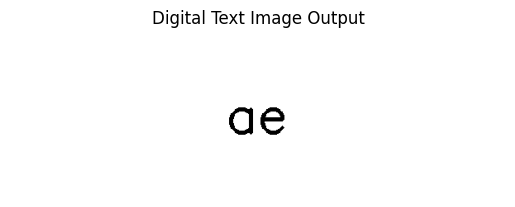

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import cv2

# Set width and height for output image
width = 600
height = 200

# Create a white blank image
output_img = np.ones((height, width, 3), dtype=np.uint8) * 255

# Define font
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
font_thickness = 3
font_color = (0, 0, 0)  # Black color

# Get text size
(text_width, text_height), _ = cv2.getTextSize(recognized_text, font, font_scale, font_thickness)

# Calculate center position
x = (width - text_width) // 2
y = (height + text_height) // 2

# Put the recognized text on the image
cv2.putText(output_img, recognized_text, (x, y), font, font_scale, font_color, font_thickness)

# Show output image
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title('Digital Text Image Output')
plt.axis('off')
plt.show()

# Save the image
cv2.imwrite('digital_text_output.png', output_img)

# Download the digital text image
files.download('digital_text_output.png')
